### 1. Import the necessary packages - 2.5 marks

### `Project - MovieLens Data Analysis`

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

### `Objective:`
- To implement the techniques learnt as a part of the course.

### `Datasets Information:`

*rating.csv:* It contains information on ratings given by the users to a particular movie.
- user id: id assigned to every user
- movie id: id assigned to every movie
- rating: rating given by the user
- timestamp: Time recorded when the user gave a rating

*movie.csv:* File contains information related to the movies and their genre.
- movie id: id assigned to every movie
- movie title: Title of the movie
- release date: Date of release of the movie
- Action: Genre containing binary values (1 - for action 0 - not action)
- Adventure: Genre containing binary values (1 - for adventure 0 - not adventure)
- Animation: Genre containing binary values (1 - for animation 0 - not animation)
- Children’s: Genre containing binary values (1 - for children's 0 - not children's)
- Comedy: Genre containing binary values (1 - for comedy 0 - not comedy)
- Crime: Genre containing binary values (1 - for crime 0 - not crime)
- Documentary: Genre containing binary values (1 - for documentary 0 - not documentary)
- Drama: Genre containing binary values (1 - for drama 0 - not drama)
- Fantasy: Genre containing binary values (1 - for fantasy 0 - not fantasy)
- Film-Noir: Genre containing binary values (1 - for film-noir 0 - not film-noir)
- Horror: Genre containing binary values (1 - for horror 0 - not horror)
- Musical: Genre containing binary values (1 - for musical 0 - not musical)
- Mystery: Genre containing binary values (1 - for mystery 0 - not mystery)
- Romance: Genre containing binary values (1 - for romance 0 - not romance)
- Sci-Fi: Genre containing binary values (1 - for sci-fi 0 - not sci-fi)
- Thriller: Genre containing binary values (1 - for thriller 0 - not thriller)
- War: Genre containing binary values (1 - for war 0 - not war)
- Western: Genre containing binary values (1 - for western - not western)


*user.csv:* It contains information of the users who have rated the movies.
- user id: id assigned to every user
- age: Age of the user
- gender: Gender of the user
- occupation: Occupation of the user
- zip code: Zip code of the use

**`Please provide your insights wherever necessary.`**

### `Learning Outcomes:`
- Exploratory Data Analysis

- Visualization using Python

- Pandas – groupby, merging 


### `Domain` 
- Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


### 2. Read the 3 datasets into dataframes - 2.5 marks

In [3]:
user = pd.read_csv("user.csv")
item = pd.read_csv("item.csv")
data = pd.read_csv("data.csv")
# creating dataframes from csv files

### 3. Apply info, shape, describe, and find the number of missing values in the data. Present at least 3 observations from these operations - 2.5 marks
 - Note that you will need to do it for all the three datasets seperately

In [4]:
print('User')
print(user.isnull().sum())
user.info()
user.describe()
print(user.shape)
print("--------------------------------------")
print('Item')
print(item.isnull().sum())
item.info()
item.describe()
print(item.shape)
print("--------------------------------------")
print('Data')
print(data.isnull().sum())
data.info()
data.describe()
print(data.shape)
data.describe()

User
user id       0
age           0
gender        0
occupation    0
zip code      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB
(943, 5)
--------------------------------------
Item
movie id        0
movie title     0
release date    0
unknown         0
Action          0
Adventure       0
Animation       0
Childrens       0
Comedy          0
Crime           0
Documentary     0
Drama           0
Fantasy         0
Film-Noir       0
Horror          0
Musical         0
Mystery         0
Romance         0
Sci-Fi          0
Thriller        0
War             0
Western         0
dtype: int64
<clas

,user id,movie id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


In [5]:
# no null values in any of the data sets
# a mix of categorical and quantitative data sets



In [6]:
### 4. Find the number of movies per genre using the item data - 2.5 marks

In [7]:

plt.figure(figsize=(12,8))
df2 = item.drop(["movie title","release date","movie id"],axis=1)
print(df2.sum().sort_values(ascending=False))



Drama          725
Comedy         505
Thriller       251
Action         251
Romance        247
Adventure      135
Childrens      122
Crime          109
Sci-Fi         101
Horror          92
War             71
Mystery         61
Musical         56
Documentary     50
Animation       42
Western         27
Film-Noir       24
Fantasy         22
unknown          1
dtype: int64


<Figure size 864x576 with 0 Axes>

In [8]:
# 1 movie does not have a genre
# Drama and Comedy have the highest number of movies
# Thriller, Action and Romance are in a cluster of almost the same number of movies as is Adventure, Childrens, Crime and Sci-Fi
# The remaining genres have below 100 movies per genre




### 5. Drop the movie where the genre is unknown - 2.5 marks

In [9]:
df = item.drop(item[item['unknown'] >= 1].index)
print(item.shape)
print(df.shape)
df1 = df.drop(["movie title","release date","movie id", "unknown"],axis=1)
print(df1)







(1681, 22)
(1680, 22)
      Action  Adventure  Animation  Childrens  Comedy  Crime  Documentary  \
0          0          0          1          1       1      0            0   
1          1          1          0          0       0      0            0   
2          0          0          0          0       0      0            0   
3          1          0          0          0       1      0            0   
4          0          0          0          0       0      1            0   
...      ...        ...        ...        ...     ...    ...          ...   
1676       0          0          0          0       0      0            0   
1677       0          0          0          0       0      0            0   
1678       0          0          0          0       0      0            0   
1679       0          0          0          0       1      0            0   
1680       0          0          0          0       0      0            0   

      Drama  Fantasy  Film-Noir  Horror  Musical  Mys

In [10]:

# One movie has a genre of unknown and the movie title is Good Morning
# The row and column count before I dropped the movie was (1681, 22) and after (1680, 22)

### 6. Find the movies that have more than one genre - 5 marks

hint: use sum on the axis = 1

Display movie name, number of genres for the movie in dataframe

and also print(total number of movies which have more than one genres)

In [11]:

item = pd.read_csv('item.csv')
item_filter = item.drop(["release date","movie id"],axis=1)
item_filter["sum"] = item_filter.sum(axis=1)
item_filtered = item_filter[item_filter['sum']>1]
print(item_filtered.shape)
print(item_filtered)


   


(849, 21)
             movie title  unknown  Action  Adventure  Animation  Childrens  \
0             Toy Story         0       0          0          1          1   
1             GoldenEye         0       1          1          0          0   
3            Get Shorty         0       1          0          0          0   
4               Copycat         0       0          0          0          0   
6        Twelve Monkeys         0       0          0          0          0   
...                  ...      ...     ...        ...        ...        ...   
1667  MURDER and murder         0       0          0          0          0   
1668            Tainted         0       0          0          0          0   
1671             Mirage         0       1          0          0          0   
1677          B. Monkey         0       0          0          0          0   
1678      Sliding Doors         0       0          0          0          0   

      Comedy  Crime  Documentary  Drama  ...  Film-No

In [12]:
# There are 849 movies with more than 1 genre



### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

*HINT: Use distplot for age and countplot for release year, ratings, *

*HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split() as depicted below or you could convert it to pandas datetime format and extract year (.dt.year)*

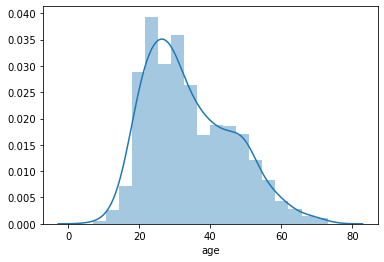

In [13]:
import re
a = '01-Jan-1995'
def getYear(x):
    return re.search(r"\d\d\d\d",x).group()
sns.distplot(user['age']);

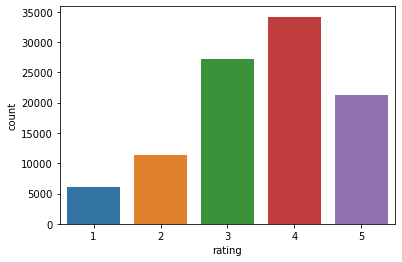

In [14]:
sns.countplot(data['rating']);

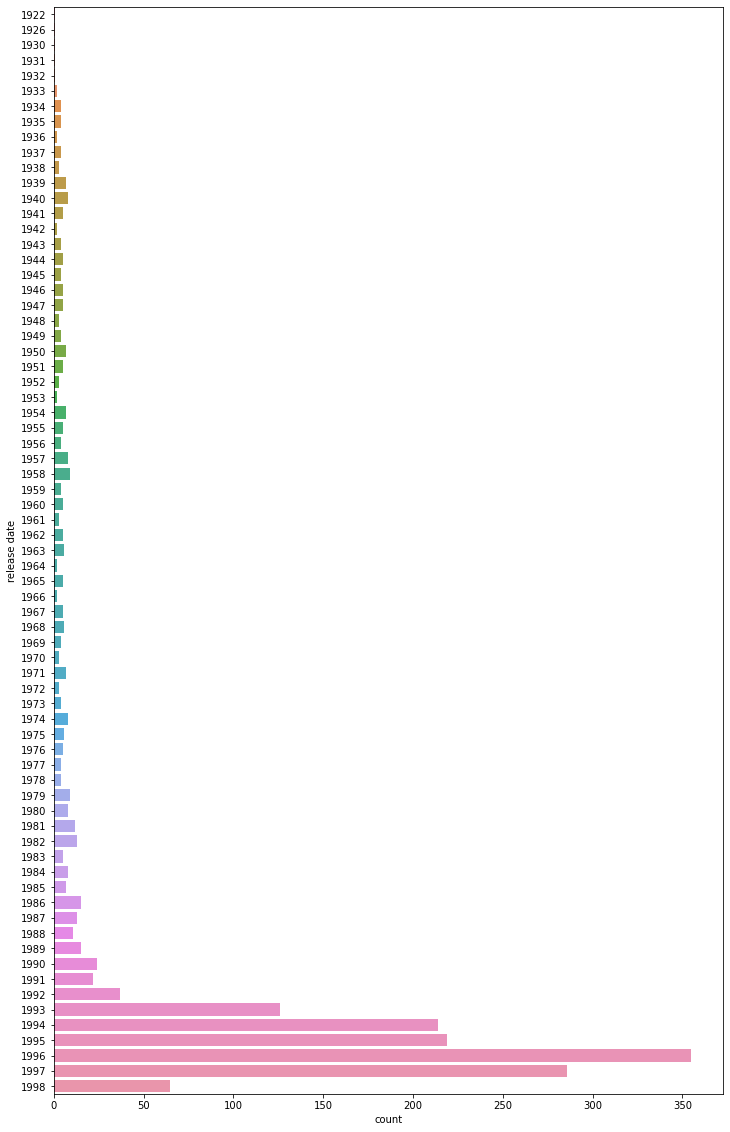

In [15]:
plt.figure(figsize=[12,20])
def getYear(x):
    return re.search(r"\d\d\d\d",x).group()
item = pd.read_csv("item.csv")
item['release date'] = item['release date'].apply(getYear)
sns.countplot(data=item, y=item['release date']);

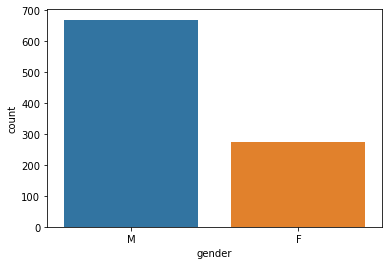

In [16]:
sns.countplot(data=user, x=user['gender']);

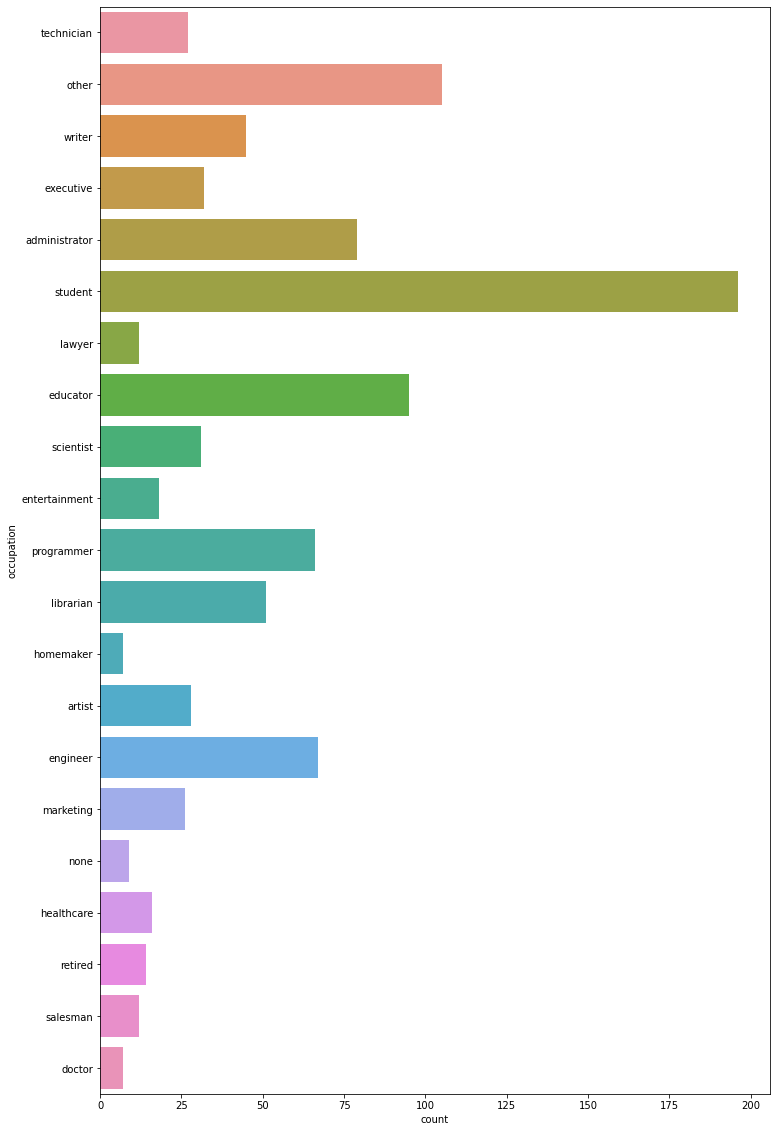

In [17]:
plt.figure(figsize=[12,20])
sns.countplot(data=user, y=user['occupation']);

In [18]:
#your code here

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the **percent of number of releases in a year** as a parameter of popularity of a genre

Hint 1: You need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa. (Drop unnecessary column if there are any)

Hint 2: Find the total number of movies release in a year(use item dataset to get count of movies released in a particular year, store that value in a new column as 'total'). Now divide the value of each genre in that year by total to get percentage number of release in a particular year.
`(df.div(df['total'], axis= 0) * 100)`

Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 3: Use groupby on the relevant column and use sum() on the same to find out the number of releases in a year/genre.

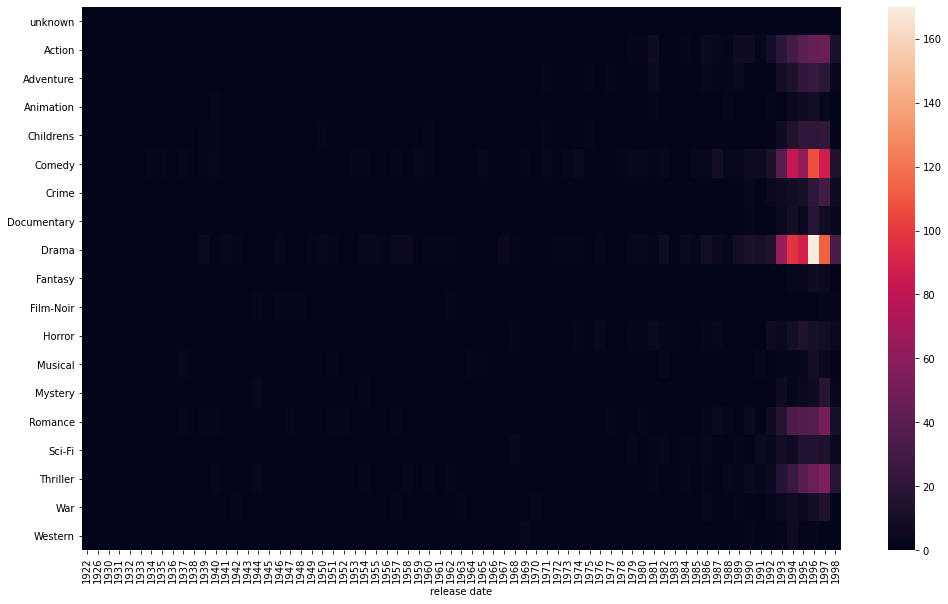

In [20]:
import re
plt.figure(figsize=[17,10])

def getYear(x):
    return re.search(r"\d\d\d\d",x).group()
item = pd.read_csv("item.csv")
item['release date'] = item['release date'].apply(getYear)
dgenre = item.groupby('release date').sum()
dgenre = dgenre.drop('movie id', axis=1)
dgenre = dgenre.transpose()

sns.heatmap(data=dgenre,annot=False);


In [51]:
# Drama has become more popular starting 1994, the same is true for Comedy
# Romance, Thriller and Action have become popular as well but not as popular as Comedy and Drama




### 9. Find the top 25 movies in terms of average ratings for movies that have been rated more than 100 times - 10 marks

Hints : 

1. Find the count of ratings and average ratings for every movie.
2. Slice the movies which have ratings more than 100.
3. Sort values according to average rating such that movie which highest rating is on top.
4. Select top 25 movies.
5. You will have to use the .merge() function to get the movie titles.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [63]:

moviecount = data.groupby("movie id")["rating"].count()
movieavg = data.groupby("movie id")["rating"].mean()
moviecount100 = moviecount[moviecount > 100]
movieavgsort = movieavg.sort_values(ascending=False)

li = []
counter = 0
for x in movieavgsort.index:
    if x in moviecount100.index:
        li.append(x)
        counter = counter + 1
        if counter == 25:
            break
for x in li:
     y = item[item['movie id'] == x]
     print(y['movie title'].values)
   







['Close Shave, A ']
["Schindler's List "]
['Wrong Trousers, The ']
['Casablanca ']
['Shawshank Redemption, The ']
['Rear Window ']
['Usual Suspects, The ']
['Star Wars ']
['12 Angry Men ']
['Citizen Kane ']
['To Kill a Mockingbird ']
["One Flew Over the Cuckoo's Nest "]
['Silence of the Lambs, The ']
['North by Northwest ']
['Godfather, The ']
['Secrets & Lies ']
['Good Will Hunting ']
['Manchurian Candidate, The ']
['Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb ']
['Raiders of the Lost Ark ']
['Vertigo ']
['Titanic ']
['Lawrence of Arabia ']
['Maltese Falcon, The ']
['Empire Strikes Back, The ']


### 10. Check for the validity of the below statements with respect to the data provided - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women

**compare the percentages**

**Please pay attention to what should be the denominator while calculating percentages**

1. Merge all the datasets

2. There is no need to conduct statistical tests around this. Just **compare the percentages** and comment on the validity of the above statements.

3. you might want ot use the .sum(), .div() function here.

4. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

In [29]:

user = pd.read_csv("user.csv")
item = pd.read_csv("item.csv")
data = pd.read_csv("data.csv")
dffirst = pd.merge(user,data,on='user id', how="inner")
dfsecond = pd.merge(item, dffirst, on='movie id', how='inner')
dfg = dfsecond.groupby('gender').sum()
dfg = dfg.drop(['movie id', 'unknown', 'user id','age', 'rating','timestamp'], axis=1)
dfg['total'] = dfg.sum(axis = 1) 
dfg = dfg.div(dfg.total, axis= 0) * 100
print(dfg)




           Action  Adventure  Animation  Childrens     Comedy     Crime  \
gender                                                                    
F       10.133889   5.849053   1.852852   4.156347  15.023929  3.340720   
M       12.680320   6.679087   1.642708   3.115480  13.698044  3.940611   

        Documentary      Drama   Fantasy  Film-Noir    Horror   Musical  \
gender                                                                    
F          0.348224  20.498687  0.675965   0.716933  2.229009  2.685239   
M          0.359382  18.181189  0.622467   0.848418  2.593087  2.210418   

         Mystery    Romance    Sci-Fi  Thriller       War   Western  total  
gender                                                                      
F       2.446882  10.908549  4.895626   9.47096  4.076274  0.690862  100.0  
M       2.474132   8.561592  6.357468  10.56494  4.537272  0.933385  100.0  


**Conclusion:**
    


In [ ]:
# 20% of the women watch drama and 18% of the men watch drama, women are more likely to watch drama than men
# 5% of the women watch Sci-Fi and 6% of the men watch Sci-Fi. men are more likely to watch sci-fi than women
# 11% of women watch Romance and 9% of men watch Romance, women are more likely to watch romance than men